# **Task 2**

In [ ]:
import csv

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import pylab
import seaborn as sns

from IPython.core.display import display, HTML

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**PART 1**

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv", header = 0)
#reset index
data = data.reset_index()
data.head()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
species_list = list(data["variety"].unique())
print("Types of species: %s\n" % species_list)

print("Dataset length: %i\n" % len(data))

print("Sepal length range: [%s, %s]" % (min(data["sepal.length"]), max(data["sepal.length"])))
print("Sepal width range:  [%s, %s]" % (min(data["sepal.width"]), max(data["sepal.width"])))
print("Petal length range: [%s, %s]" % (min(data["petal.length"]), max(data["petal.length"])))
print("Petal width range:  [%s, %s]\n" % (min(data["petal.width"]), max(data["petal.width"])))

print("Sepal length variance:\t %f" % np.var(data["sepal.length"]))
print("Sepal width variance: \t %f" % np.var(data["sepal.width"]))
print("Petal length variance:\t %f" % np.var(data["petal.length"]))
print("Petal width variance: \t %f\n" % np.var(data["petal.width"]))

print("Sepal length stddev:\t %f" % np.std(data["sepal.length"]))
print("Sepal width stddev: \t %f" % np.std(data["sepal.width"]))
print("Petal length stddev:\t %f" % np.std(data["petal.length"]))
print("Petal width stddev: \t %f\n" % np.std(data["petal.width"]))

print("Data describe\n---")
print(data[data.columns[2:]].describe())


Types of species: ['Setosa', 'Versicolor', 'Virginica']

Dataset length: 150

Sepal length range: [4.3, 7.9]
Sepal width range:  [2.0, 4.4]
Petal length range: [1.0, 6.9]
Petal width range:  [0.1, 2.5]

Sepal length variance:	 0.681122
Sepal width variance: 	 0.188713
Petal length variance:	 3.095503
Petal width variance: 	 0.577133

Sepal length stddev:	 0.825301
Sepal width stddev: 	 0.434411
Petal length stddev:	 1.759404
Petal width stddev: 	 0.759693

Data describe
---
       sepal.width  petal.length  petal.width
count   150.000000    150.000000   150.000000
mean      3.057333      3.758000     1.199333
std       0.435866      1.765298     0.762238
min       2.000000      1.000000     0.100000
25%       2.800000      1.600000     0.300000
50%       3.000000      4.350000     1.300000
75%       3.300000      5.100000     1.800000
max       4.400000      6.900000     2.500000


Text(0.5, 0.98, 'Analyzing distribution for the series')

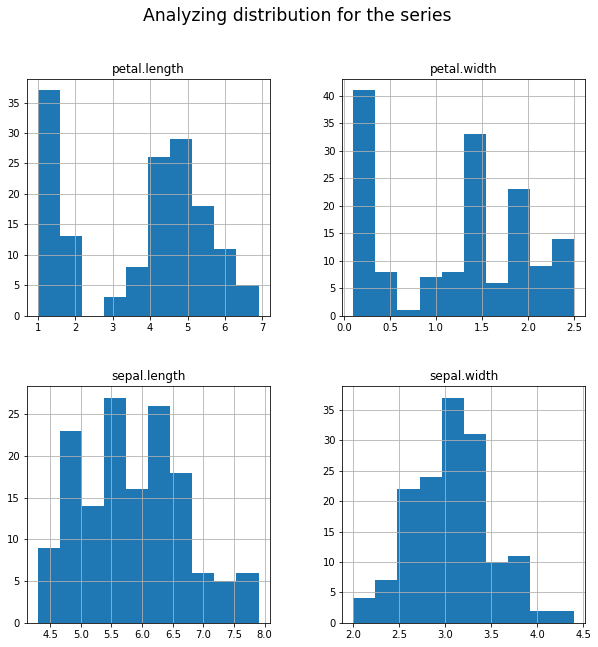

In [ ]:
data.hist(
    column=["sepal.length", "sepal.width", "petal.length", "petal.width", "variety"],
    figsize=(10, 10)
   
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

*At first sight*, **Petal Length** and **Petal Width** seem to diverge from the normal distribution considering the shapes of the curves. 

**Conducting p-Test for each variable**

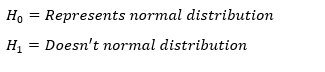

In [ ]:
import scipy.stats as stats

for param in ["sepal.length", "sepal.width", "petal.length", "petal.width"]:
    z, pval = stats.normaltest(data[param])
    if(pval < 0.05):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

sepal.length has a p-value of 0.056824
sepal.width has a p-value of 0.209734
petal.length has a p-value of 0.000000 - distribution is not normal
petal.width has a p-value of 0.000000 - distribution is not normal


*By considering the P Value for 5% confidence*

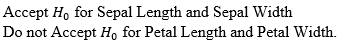


Therefore, considering the high p value, we are taking Sepal Width to plot the Normal Distribution

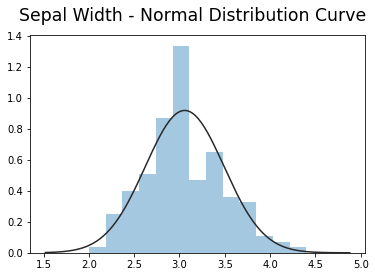

In [ ]:
from numpy import mean,std
from scipy.stats import norm
from matplotlib import pyplot
import seaborn as sns

df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv", header = 0)
sepal_width = df['sepal.width'].tolist()

sns.distplot(sepal_width, fit=norm, kde=False)
pylab.suptitle("Sepal Width - Normal Distribution Curve", fontsize="xx-large")
pyplot.show()

**PART 2**

**Finding Correlation Coefficient**

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,NaN,NaN,NaN
sepal.width,-0.117570,1.000000,NaN,NaN
petal.length,0.871754,-0.428440,1.000000,NaN
petal.width,0.817941,-0.366126,0.962865,1.0


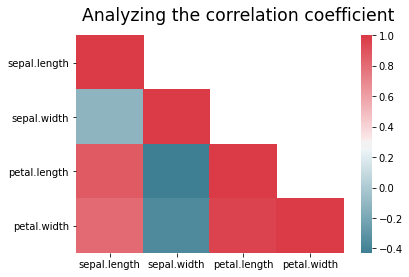

In [ ]:
dt = data[data.columns[1:]]

corr = dt.corr(method="pearson")

bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)
pylab.suptitle("Analyzing the correlation coefficient", fontsize="xx-large")
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### **Theory of Correlation Coefficient  is:**

*   **1** is total **positive linear correlation**
*   **0** is **no linear correlation**
*   **−1** is total **negative linear correlation**

### Interpretation

*Diagonal values and upper triangle are ignored.*

Therefore, we find:

1.   A **high positive correlation** between PetalWidth and PetalLength (*0.96*)
2.   A **high positive correlation** between PetalLength and SepalLength (*0.87*)
3.   A **high positive correlation** between PetalWidth and SepalLength (*0.81*)


We can observe correlations between these main attributes: 

*PetalWidth*, *PetalLength* and *SepalLength*. 

**Plotting the Correlation**

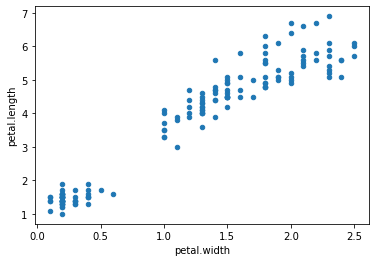

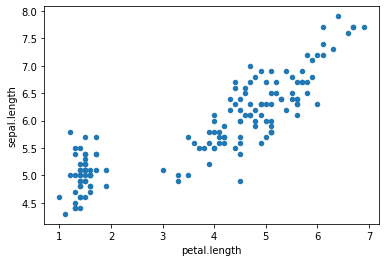

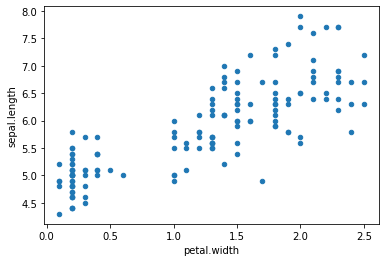

In [ ]:
from sklearn import linear_model

display(HTML('<h2>Scatterplots for the correlating pairs</h2>'))

dt.plot(kind='scatter', x='petal.width', y='petal.length');
dt.plot(kind='scatter', x='petal.length', y='sepal.length');
dt.plot(kind='scatter', x='petal.width', y='sepal.length');

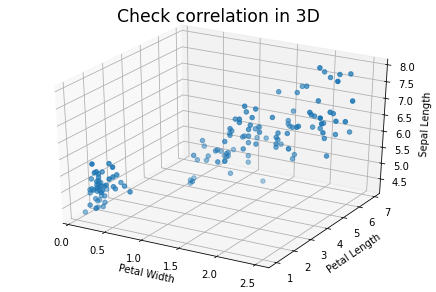

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [data["petal.width"], data["petal.length"]]
n = 100
ax.scatter(data["petal.width"], data["petal.length"], data["sepal.length"])

ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Sepal Length')

plt.tight_layout(pad=0.5)
pylab.suptitle("Check correlation in 3D", fontsize="xx-large")
plt.show()